#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [11]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [12]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

1) Basic Data Exploration: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.



In [13]:
# the number of rows and columns in the dataset
df_shape=df.shape
n_rows=df_shape[0]
n_columns=df_shape[1]
print("number of rows in salary dataset:",n_rows)
print("Number of columns in salary dataset:",n_columns,"\n")
# data types of each column, and check for missing values in each column.
df.info()

number of rows in salary dataset: 148654
Number of columns in salary dataset: 13 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


2) Descriptive Statistics: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation

In [14]:
import statistics
import numpy as np

# Calculate mean, median, mode
mean_salary = np.mean(df.TotalPay)
median_salary = statistics.median(df.TotalPay)
mode_salary = statistics.mode(df.TotalPay)

# Calculate minimum and maximum
min_salary = min(df.TotalPay)
max_salary = max(df.TotalPay)

# Calculate range
salary_range = max_salary - min_salary

# Calculate standard deviation
std_dev_salary = np.std(df.TotalPay)

# Print the results
print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation: {std_dev_salary}")


Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation: 50516.83535894512


3) Data Cleaning: Handle missing data by suitable method with explain why you use it.

In [15]:
import pandas as pd
# Number of missing values in each column
missing_values = df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)
# Handling missing values in each column

# Drop 'Notes' and 'Status' columns
df = df.drop(['Notes', 'Status'], axis=1)

df['BasePay'].fillna(df['BasePay'].median(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].median(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].median(), inplace=True)
df['Benefits'].fillna(df['Benefits'].median(), inplace=True)

# Display the number of missing values after handling them
missing_values_after_handling = df.isnull().sum()

# Print or display the results
print("Number of missing values in each column after handling:")
print(missing_values_after_handling)

''' BasePay column has 609 missing values
    OvertimePay has 4 missing values
    OtherPay has 4 missing values
    Benefits has 36163 missing values
    Filling all the previous columns with median value because the median is not affected by outliers
    columns Notes and Status values are all null so we just drop them '''


Number of missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64
Number of missing values in each column after handling:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


' BasePay column has 609 missing values\n    OvertimePay has 4 missing values\n    OtherPay has 4 missing values\n    Benefits has 36163 missing values\n    Filling all the previous columns with median value because the median is not affected by outliers\n    columns Notes and Status values are all null so we just drop them '

4) Basic Data Visualization: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

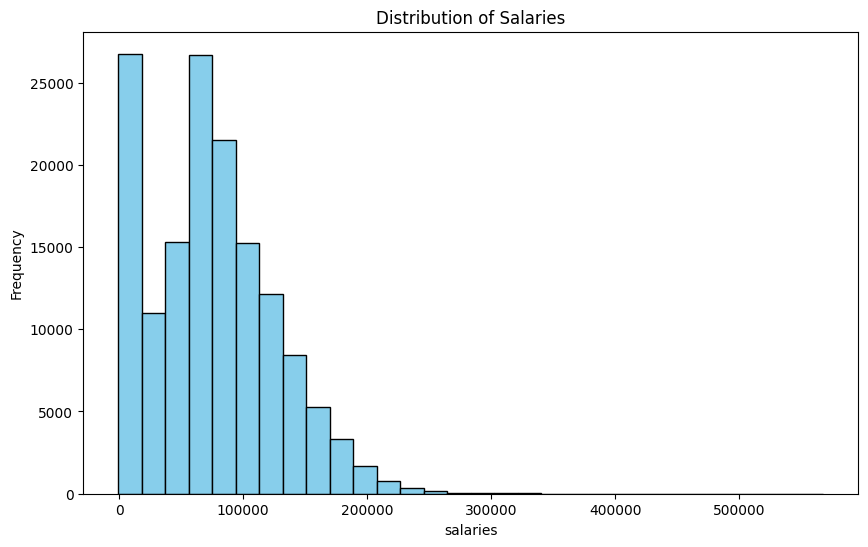

                                         JobTitle         Department
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  other departments
1                 CAPTAIN III (POLICE DEPARTMENT)  POLICE DEPARTMENT
2                 CAPTAIN III (POLICE DEPARTMENT)  POLICE DEPARTMENT
3            WIRE ROPE CABLE MAINTENANCE MECHANIC  other departments
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)    FIRE DEPARTMENT
5                       ASSISTANT DEPUTY CHIEF II  other departments
6              BATTALION CHIEF, (FIRE DEPARTMENT)    FIRE DEPARTMENT
7                  DEPUTY DIRECTOR OF INVESTMENTS  other departments
8              BATTALION CHIEF, (FIRE DEPARTMENT)    FIRE DEPARTMENT
9          CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    FIRE DEPARTMENT

Departments and their counts
 other departments    146060
CIVIL/CRIMINAL         1534
POLICE DEPARTMENT       712
SEASONAL                116
MFCC                     90
FIRE DEPARTMENT          78
SFERS                    64
Name: Departme

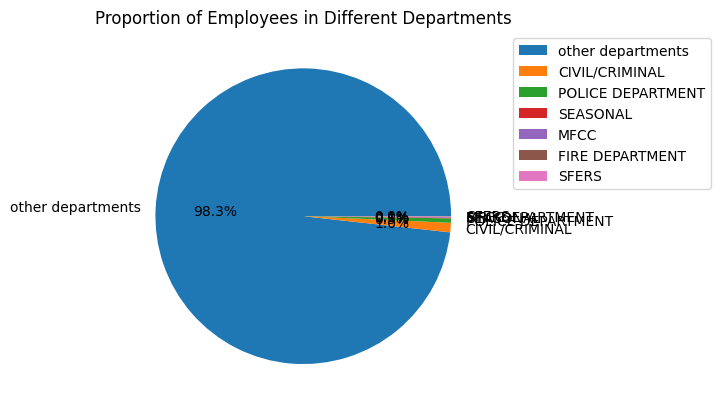

In [16]:
import matplotlib.pyplot as plt

# Distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.show()
# since we dont have a column called department i will extract the departments from JobTitle	column

df["Department"]=df['JobTitle'].str.extract(r'\(([^)]+)(?:,\s*|-\s*|[^)]+)?\)')
# *it should extract departements that starts with - but it didnt work
df["Department"]=df["Department"].str.upper()
df["Department"]=df["Department"].str.replace('FIRE DEPT', 'FIRE DEPARTMENT')
df["Department"]=df["Department"].replace(['CIVIL & CRIMINAL','CVL&CRMN','CIVIL/CRIMINALL','CVL&CRMNL'], 'CIVIL/CRIMINAL')
# Fill missing values in 'Department' column (due to NaN values resulting from the regular expression)
df['Department'] = df['Department'].fillna('other departments')


print(df[['JobTitle', 'Department']].head(10))
print("\nDepartments and their counts\n",df["Department"].value_counts())
# Proportion of employees in different departments

department_counts = df['Department'].value_counts()

plt.pie(department_counts, labels=department_counts.index,autopct="%1.1f%%")
plt.title('Proportion of Employees in Different Departments')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()
# because there the percentage of other departments is high so the other departments in the pie chart was not visually noticeable

5) Grouped Analysis: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups

In [17]:
# Group the data by 'JobTitle' and calculate the mean salary for each group
grouped_data = df.groupby('JobTitle').agg({
   'BasePay': ['mean', 'std'],
    'OvertimePay': ['mean', 'std'],
    'OtherPay': ['mean', 'std'],
    'Benefits': ['mean', 'std'],
    'TotalPay': ['mean', 'std'],
    'TotalPayBenefits': ['mean', 'std']
})

# Print the grouped data
print(grouped_data.head())

# Compare the average salaries across different groups
print("\nAverage salaries by JobTitle:")
for job_title, stats in grouped_data['TotalPay']['mean'].items():
    print(f"{job_title}: ${stats:.2f}")


                                  BasePay               OvertimePay  \
                                     mean           std        mean   
JobTitle                                                              
ACCOUNT CLERK                43300.806506  12890.631740  373.200843   
ACCOUNTANT                   46643.172000  27703.019579    0.000000   
ACCOUNTANT INTERN            28732.663958  20635.668379   24.430625   
ACPO,JuvP, Juv Prob (SFERS)  62290.780000           NaN    0.000000   
ACUPUNCTURIST                66374.400000           NaN    0.000000   

                                             OtherPay               Benefits  \
                                     std         mean          std      mean   
JobTitle                                                                       
ACCOUNT CLERK                1400.408714   361.656988   576.172993  28628.62   
ACCOUNTANT                      0.000000   786.096000  1221.582691  28628.62   
ACCOUNTANT INTERN             1

6) Simple Correlation Analysis: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

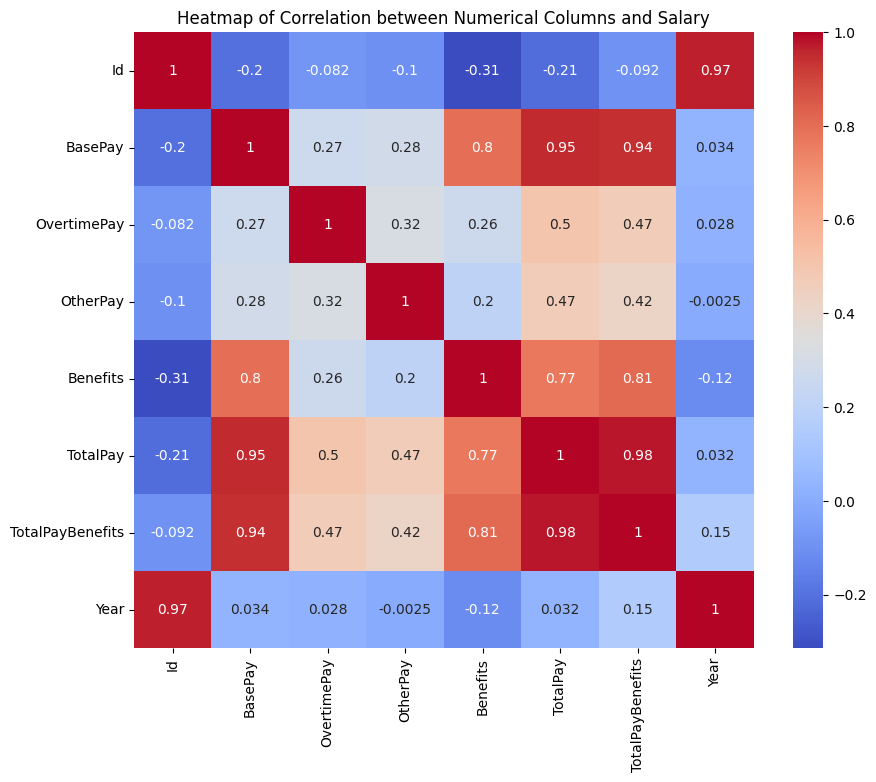

In [22]:
# Heatmap that shows the correlation between the numerical columns and the salary
import seaborn as sns
plt.figure(figsize=(10, 8))
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap of Correlation between Numerical Columns and Salary")
plt.show()

Correlation between TotalPay and BasePay


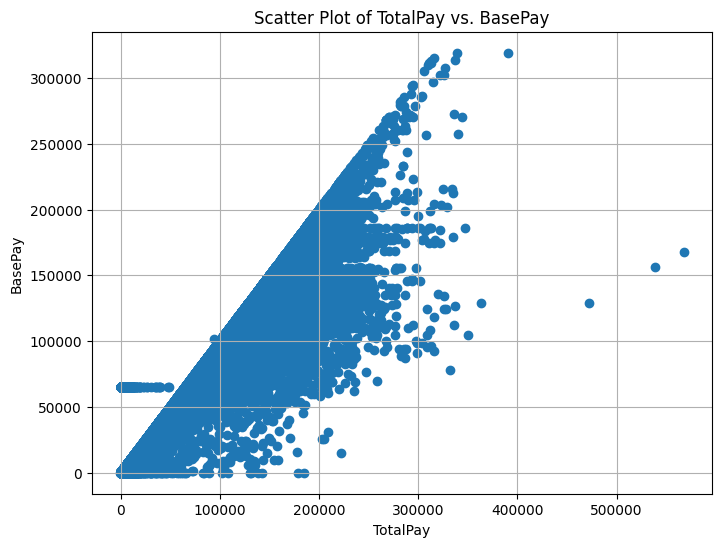

In [ ]:
# the most correlated columns to TotalPay are BasePay and TotalPayBenefits and Benefits
# i will choose BasePay to visualize the correlation in a scatter plot
# Calculate the correlation coefficient

correlation = df['TotalPay'].corr(df['BasePay'])

# Print the correlation coefficient
print("Correlation between TotalPay and BasePay")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['TotalPay'], df['BasePay'])
plt.xlabel('TotalPay')
plt.ylabel("BasePay")
plt.title("The correlation between TotalPay and BasePay")
plt.grid(True)
plt.show()
# there is a really strong relationship between them with  a little bit of outliers

# * Summary of Insights:

* Salary dataset has 148654 rows and 13 columns.

* There were a lot of missing values that I handled either by filling them with the appropriate method or by dropping the columns, that wouldn't be useful if I filled these missing values because of their large number.

* The average salary is 71426.609 taking into consideration the outliers

* Minimum Salary is -618.13 which needs to be changed because there is no negative salary.
* The distibution of salaries is skewed to the right.

* The most correlated columns to TotalPay (salary) are BasePay,TotalPayBenefits and Benefits
* There is a storng positive relationship between TotalPay and BasePay as shown in the scatter plot.



# Good Luck!